<a href="https://colab.research.google.com/github/Nathan-Jordan/Twitter-Sentiment-Analysis-Bot/blob/main/Group16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Tweepy
#Saman
#Nathan
#Daniel
#Pip
#Georgios
#Abraham
#Dume
!pip install tweepy
#Installation of graph interface
!pip install matplotlib

In [ ]:
import re
import tweepy
#importing the graph interface
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from datetime import datetime
from pytz import timezone

consumer_api_key = 'WnOse4KW0dwPNcrYtymJ11jMQ'
consumer_api_secret = 's9DhKqHASJISJETy462fupugBRMRDoTzRxvUfLJCU4N5fe3Jfl' 
access_token = '1315961217740091392-ZXiF60BdxeQ8irqRAItWyZ567b0HDQ'
access_token_secret ='wL2NRBt7sl3ldb8eVHjjxGEZgY2jgqslZOPROcQiG3U0L'

In [ ]:
authorizer = OAuthHandler(consumer_api_key, consumer_api_secret)
authorizer.set_access_token(access_token, access_token_secret)

In [ ]:
api = tweepy.API(authorizer ,timeout=15)
all_tweets = []
SearchValue = ""

tweet_incoming = api.search(q="@Covid_16_Bot", count=1)

final_query = tweet_incoming[0].text.replace("@Covid_16_Bot ","").strip()

if "OR" in final_query or "or" in final_query:
  SearchValue = final_query.split(" OR ")
else:
  SearchValue = [final_query]

for ix in SearchValue:
  for tweet_object in tweepy.Cursor(api.search,q=ix+" -filter:retweets",lang='en',result_type='recent').items(200):
    all_tweets.append(tweet_object.text)

In [ ]:
print(all_tweets)

['@MsKegelVee Good morning baby girl hope you’re having a beautiful day', '@Eejayyyyyyyy @eyedine2 Good point.', '@NCTsmtown you did well today!! have a good rest too 💚', '@SAfridiOfficial \n\nGood evening 💕 https://t.co/xWdfrXqGW4', '@dazaisboo_ I havent watch it yet. Is it good?', 'Good thread on practicalities if the UK (or an independent Scotland) decides to rejoin the EU once the disaster of… https://t.co/0RFMNC4r0q', '@painterguy416 Good morning Russ', '#YRHPKFDDemandJustice\n\nGood show YRHPKrians, MisBirians. I am confident that we will succeed in bringing back our s… https://t.co/m2KpvXgFBc', 'Acha chlo ek duty toh krskte ho \nRoz Subha oar night m Good morning pic and good night pic daloge insta Twitter m o… https://t.co/MNcB4AXaxZ', '@icarussunflower Good morning babe🦋\U0001f90d', 'If you sign up and invest, we both get a free share. Had a couple so far and always been really good - last one was… https://t.co/RN3bKHFze3', 'Sex is good, but have you ever FUCKED the SYSTEM?\n#

In [ ]:
import numpy as np 
import pandas as pd 
import re  
import nltk # an amazing library to play with natural language
nltk.download('stopwords')  
from nltk.corpus import stopwords 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweets = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")
print(tweets)

                 tweet_id  ...               user_timezone
0      570306133677760513  ...  Eastern Time (US & Canada)
1      570301130888122368  ...  Pacific Time (US & Canada)
2      570301083672813571  ...  Central Time (US & Canada)
3      570301031407624196  ...  Pacific Time (US & Canada)
4      570300817074462722  ...  Pacific Time (US & Canada)
...                   ...  ...                         ...
14635  569587686496825344  ...                         NaN
14636  569587371693355008  ...                         NaN
14637  569587242672398336  ...                         NaN
14638  569587188687634433  ...  Eastern Time (US & Canada)
14639  569587140490866689  ...                         NaN

[14640 rows x 15 columns]


In [ ]:
X = tweets.iloc[:, 10].values  
y = tweets.iloc[:, 1].values

print(X)

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 ... '@AmericanAir Please bring American Airlines to #BlackBerry10'
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']


In [ ]:
processed_tweets = []
 
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_tweets).toarray()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

 mskegelvee good morning baby girl hope you re having beautiful day : ['negative']
 eejayyyyyyyy eyedine2 good point  : ['negative']
 nctsmtown you did well today have good rest too  : ['negative']
 safridiofficial good evening https co xwdfrxqgw4 : ['positive']
 dazaisboo_ havent watch it yet is it good  : ['negative']
good thread on practicalities if the uk or an independent scotland decides to rejoin the eu once the disaster of https co 0rfmnc4r0q : ['neutral']
 painterguy416 good morning russ : ['neutral']
 yrhpkfddemandjustice good show yrhpkrians misbirians am confident that we will succeed in bringing back our https co m2kpvxgfbc : ['neutral']
acha chlo ek duty toh krskte ho roz subha oar night good morning pic and good night pic daloge insta twitter o https co mncb4axaxz : ['neutral']
 icarussunflower good morning babe  : ['neutral']
if you sign up and invest we both get free share had couple so far and always been really good last one was https co rn3bkhfze3 : ['negative']
sex

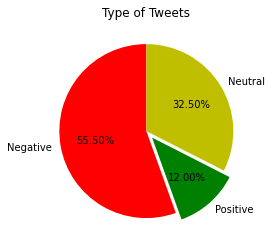

2020-10-15 13:17:46 BST+0100


In [ ]:
PositiveCount = 0
NeutralCount = 0
NegativeCount = 0

for tweet in all_tweets:
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', tweet)
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    sentiment = text_classifier.predict(tfidfconverter.transform([ processed_tweet]).toarray())
    print(processed_tweet ,":", sentiment)


    if "neutral" in sentiment:
      NeutralCount += 1
    elif "negative" in sentiment:
      NegativeCount += 1
    else:
      PositiveCount += 1

PosPer = PositiveCount/len(all_tweets)*100
NegPer = NegativeCount/len(all_tweets)*100
NeuPer = NeutralCount/len(all_tweets)*100

#prints out the sentiment analysis of the tweets
print("Negative Count:", NegativeCount, "- {:.2f}%".format(NegPer))
print("Neutral Count:", NeutralCount, "- {:.2f}%".format(NeuPer))
print("Positive Count: ", PositiveCount, "- {:.2f}%".format(PosPer))


labels = "Negative", "Positive", "Neutral"
sections = [NegPer, PosPer, NeuPer]
colors = ["r", "g", "y"]

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = "%1.2f%%")

#creates the pi chart
plt.title("Type of Tweets")
plt.savefig("graph.png")
plt.show()

#finds the exact date and time for the tweet
fmt = "%Y-%m-%d %H:%M:%S %Z%z"
now_utc = datetime.now(timezone('UTC'))

now_uk = now_utc.astimezone(timezone('Europe/London'))
print(now_uk.strftime(fmt))

#creates the text to be shown in our tweet
ourtweet =  'Search: "' + final_query + '"  @ ' + now_uk.strftime(fmt) + '\n' + \
            'Positive Count: {} - {:.2f}%\n'.format(PositiveCount, PosPer) + \
            'Negative Count: {} - {:.2f}%\n'.format(NegativeCount, NegPer) + \
            'Neutral Count: {} - {:.2f}%\n\n#UoE2020LovecaceChallengeWeek'.format(NeutralCount, NeuPer)


#Replies to incoming tweet
for s in tweet_incoming:
  sn = s.user.screen_name
  m = "@{}\n{}".format(sn, ourtweet)
  api.update_with_media("graph.png", m, s.id)